<a href="https://colab.research.google.com/github/labhanshg/Loan-Approval-Model/blob/main/Copy_of_Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 1- Data Collection & Exploration**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_excel('df1_loan.xlsx')
print(df.head())

   Unnamed: 0   Loan_ID Gender Married Dependents     Education Self_Employed  \
0           0  LP001002   Male      No          0      Graduate            No   
1           1  LP001003   Male     Yes          1      Graduate            No   
2           2  LP001005   Male     Yes          0      Graduate           Yes   
3           3  LP001006   Male     Yes          0  Not Graduate            No   
4           4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status Total_Income  
0             1.0         U

Here the column 1 and column 2 (Unnamed: 0 and Loan_ID) aren't required

In [ ]:
df.columns


Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [ ]:
df=df.iloc[:,2:]
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0
496,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0
497,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,$7482.0
498,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0


In [ ]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (500, 13)


So we have 13 features and 500 entries.

In [ ]:
df.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


Out of those 15 features, 8 are in string format.

*   Other columns like Dependents, Total_Income needs cleaning and typecasting



In [ ]:
df['Dependents'] = df['Dependents'].replace('3+', '3').astype(float)
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Female,Yes,1.0,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,4239.0
496,Male,Yes,0.0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,4300.0
497,Male,Yes,0.0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,7482.0
498,Male,Yes,1.0,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,2895.0


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Total_Income'],
      dtype='object')

Categorical Columns:
Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    object 
 1   Married            497 non-null    object 
 2   Dependents         488 non-null    float64
 3   Education          500 non-null    object 
 4   Self_Employed      473 non-null    object 
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         482 non-null    float64
 8   Loan_Amount_Term   486 non-null    float64
 9   Credit_History     459 non-null    float64
 10  Property_Area      500 non-null    object 
 11  Loan_Status        500 non-null    object 
 12  Total_Income       500 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 50.9+ KB


In [ ]:
df.isnull().sum()

,0
Gender,9
Married,3
Dependents,12
Education,0
Self_Employed,27
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,18
Loan_Amount_Term,14
Credit_History,41


We do have null values in the some columns

In [ ]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
count,488.000000,500.000000,500.000000,482.000000,486.000000,459.000000,500.000000
mean,0.735656,5493.644000,1506.307840,144.020747,342.543210,0.843137,6999.951840
std,1.006039,6515.668972,2134.432188,82.344919,63.834977,0.364068,6605.759256
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,1442.000000
25%,0.000000,2874.500000,0.000000,100.000000,360.000000,1.000000,4166.000000
50%,0.000000,3854.000000,1125.500000,126.500000,360.000000,1.000000,5332.500000
75%,1.000000,5764.000000,2253.250000,161.500000,360.000000,1.000000,7495.250000
max,3.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,81000.000000


From the above description it is clear that our data has outliners. as in few columns like ApplicantIncome, there is a huge gap between minimum value and 25th percentile.

In [ ]:
corr_data = df[numerical_columns].corr()
corr_data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
Dependents,1.000000,0.117853,0.015189,0.149935,-0.115584,-0.060774,0.121138
ApplicantIncome,0.117853,1.000000,-0.121292,0.583289,-0.069086,-0.031342,0.947170
CoapplicantIncome,0.015189,-0.121292,1.000000,0.205980,0.006561,-0.028496,0.203479
LoanAmount,0.149935,0.583289,0.205980,1.000000,0.030737,-0.032947,0.641289
Loan_Amount_Term,-0.115584,-0.069086,0.006561,0.030737,1.000000,0.018218,-0.066061
Credit_History,-0.060774,-0.031342,-0.028496,-0.032947,0.018218,1.000000,-0.039973
Total_Income,0.121138,0.947170,0.203479,0.641289,-0.066061,-0.039973,1.000000


The above output shows the correlation between Total_Income and Loan_Amount, indicating the positive influence. Also we can see a strong correlation between (ApplicantIncome, CoapplicantIncome) and Total_Income, it shows that our data has redundancies. we need to consider this.

This analysis was done for only numerical columns, we will look into both numerical and categorical columns collectively once we convert the categorical columns to binary numbers (0 or 1) then we will se what elements impact the Loan_Approval_Status.

# **Module 2- Data Preprocessing**

In [ ]:
df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})
df["Married"] = df["Married"].replace({"Yes": 1, "No": 0})
df["Education"] = df["Education"].replace({"Graduate": 1, "Not Graduate": 0})
df["Self_Employed"] = df["Self_Employed"].replace({"Yes": 1, "No": 0})
df["Loan_Status"] = df["Loan_Status"].replace({"Y": 1, "N": 0})
df

<ipython-input-20-45db14f57858>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})
<ipython-input-20-45db14f57858>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Married"] = df["Married"].replace({"Yes": 1, "No": 0})
<ipython-input-20-45db14f57858>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,1.0,1.0,1,0.0,3326,913.0,105.0,84.0,1.0,Semiurban,1,4239.0
496,1.0,1.0,0.0,0,0.0,2600,1700.0,107.0,360.0,1.0,Rural,1,4300.0
497,1.0,1.0,0.0,1,0.0,4625,2857.0,111.0,12.0,NaN,Urban,1,7482.0
498,1.0,1.0,1.0,1,1.0,2895,0.0,95.0,360.0,1.0,Semiurban,1,2895.0


In [ ]:
df["Property_Urban"]=df["Property_Area"].replace({"Urban":1,"Semiurban":0,"Rural":0})
df["Property_Semiurban"]=df["Property_Area"].replace({"Urban":0,"Semiurban":1,"Rural":0})
df["Property_Rural"]=df["Property_Area"].replace({"Urban":0,"Semiurban":0,"Rural":1})
df.drop("Property_Area",axis=1,inplace=True)
df

<ipython-input-21-78e5d6b01900>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Property_Urban"]=df["Property_Area"].replace({"Urban":1,"Semiurban":0,"Rural":0})
<ipython-input-21-78e5d6b01900>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Property_Semiurban"]=df["Property_Area"].replace({"Urban":0,"Semiurban":1,"Rural":0})
<ipython-input-21-78e5d6b01900>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_o

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Property_Urban,Property_Semiurban,Property_Rural
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,5849.0,1,0,0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0,0,1
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,3000.0,1,0,0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,4941.0,1,0,0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,6000.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,1.0,1.0,1,0.0,3326,913.0,105.0,84.0,1.0,1,4239.0,0,1,0
496,1.0,1.0,0.0,0,0.0,2600,1700.0,107.0,360.0,1.0,1,4300.0,0,0,1
497,1.0,1.0,0.0,1,0.0,4625,2857.0,111.0,12.0,NaN,1,7482.0,1,0,0
498,1.0,1.0,1.0,1,1.0,2895,0.0,95.0,360.0,1.0,1,2895.0,0,1,0


In [ ]:
df.isnull().sum()

,0
Gender,9
Married,3
Dependents,12
Education,0
Self_Employed,27
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,18
Loan_Amount_Term,14
Credit_History,41


In [ ]:
df= df.dropna()
print(df)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1.0      1.0         1.0          1            0.0             4583   
2       1.0      1.0         0.0          1            1.0             3000   
3       1.0      1.0         0.0          0            0.0             2583   
4       1.0      0.0         0.0          1            0.0             6000   
5       1.0      1.0         2.0          1            1.0             5417   
..      ...      ...         ...        ...            ...              ...   
494     1.0      1.0         0.0          1            0.0             3597   
495     0.0      1.0         1.0          1            0.0             3326   
496     1.0      1.0         0.0          0            0.0             2600   
498     1.0      1.0         1.0          1            1.0             2895   
499     1.0      0.0         0.0          1            0.0             6283   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [ ]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


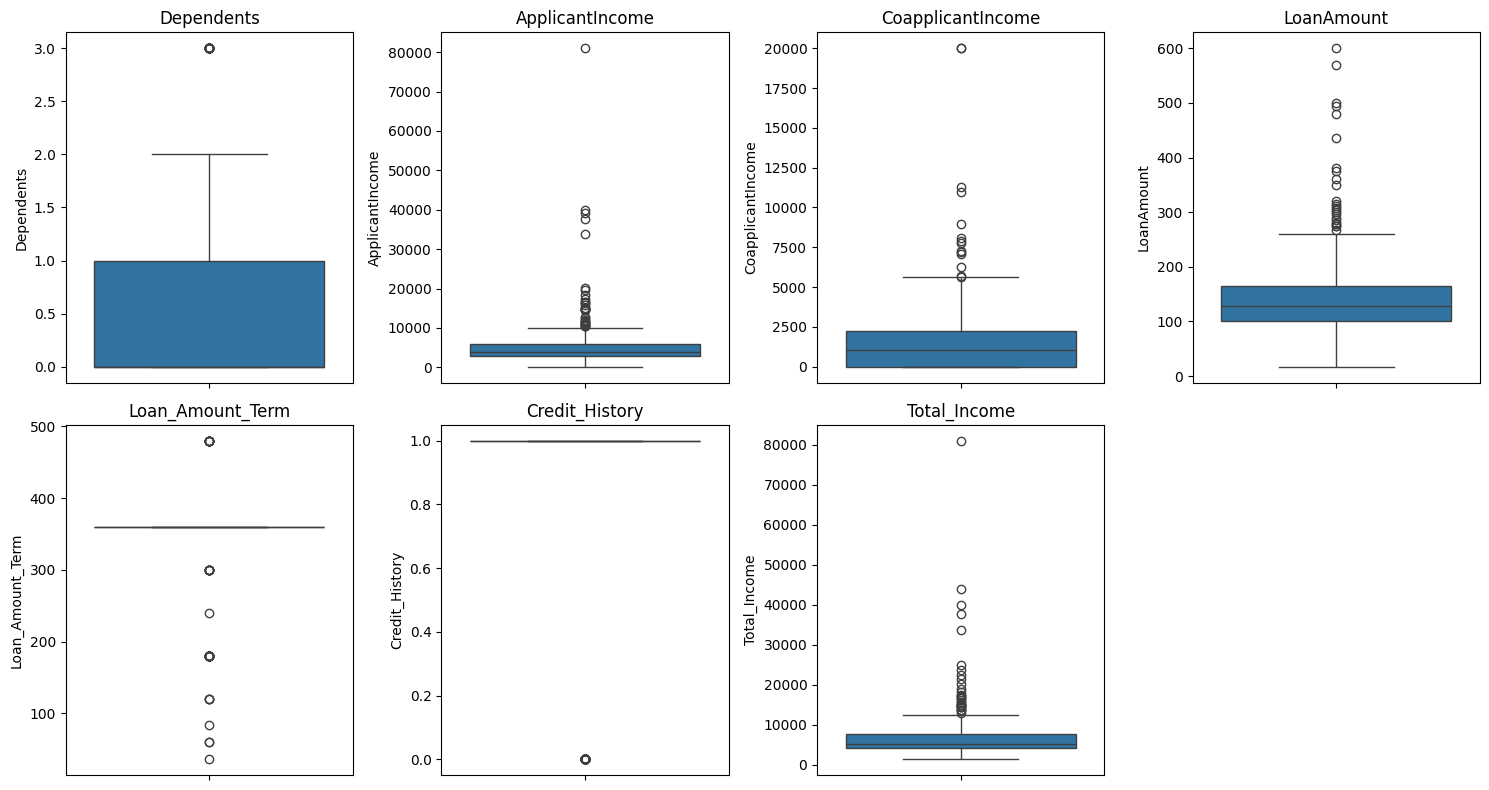

In [ ]:
# Create the box plots
plt.figure(figsize=(15, 8)) # Adjust figure size for better visualization
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 4, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [ ]:
df.drop("Total_Income",axis=1,inplace=True)
df

<ipython-input-26-dc49d543cb37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Total_Income",axis=1,inplace=True)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Urban,Property_Semiurban,Property_Rural
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0,0,1
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1,0,0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1,0,0
5,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1.0,1.0,0.0,1,0.0,3597,2157.0,119.0,360.0,0.0,0,0,0,1
495,0.0,1.0,1.0,1,0.0,3326,913.0,105.0,84.0,1.0,1,0,1,0
496,1.0,1.0,0.0,0,0.0,2600,1700.0,107.0,360.0,1.0,1,0,0,1
498,1.0,1.0,1.0,1,1.0,2895,0.0,95.0,360.0,1.0,1,0,1,0


In [ ]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Urban,Property_Semiurban,Property_Rural
Gender,1.000000,0.347388,0.206583,-0.063833,0.003953,0.055799,0.165270,0.120595,-0.068418,0.013945,0.075750,0.047304,-0.076574,0.034209
Married,0.347388,1.000000,0.369764,-0.045295,-0.001045,0.026086,0.158305,0.146596,-0.102085,0.028187,0.094214,0.021387,0.026525,-0.051214
Dependents,0.206583,0.369764,1.000000,-0.066216,0.026971,0.128810,0.049248,0.167807,-0.121954,-0.037000,0.020996,0.026978,-0.033627,0.008557
Education,-0.063833,-0.045295,-0.066216,1.000000,0.007543,0.143242,0.059418,0.170553,0.146022,0.079270,0.060699,0.002741,0.078594,-0.088566
Self_Employed,0.003953,-0.001045,0.026971,0.007543,1.000000,0.124163,0.037146,0.039582,-0.066419,-0.026852,-0.042206,-0.029033,-0.025689,0.058271
ApplicantIncome,0.055799,0.026086,0.128810,0.143242,0.124163,1.000000,-0.099141,0.493478,-0.027282,-0.080777,-0.073179,-0.074623,0.006710,0.070449
CoapplicantIncome,0.165270,0.158305,0.049248,0.059418,0.037146,-0.099141,1.000000,0.281761,0.000784,-0.034523,-0.016366,-0.025322,0.042008,-0.019422
LoanAmount,0.120595,0.146596,0.167807,0.170553,0.039582,0.493478,0.281761,1.000000,0.025281,-0.073953,-0.130718,-0.123821,0.026332,0.100322
Loan_Amount_Term,-0.068418,-0.102085,-0.121954,0.146022,-0.066419,-0.027282,0.000784,0.025281,1.000000,0.051677,-0.045462,-0.105683,0.040698,0.065753
Credit_History,0.013945,0.028187,-0.037000,0.079270,-0.026852,-0.080777,-0.034523,-0.073953,0.051677,1.000000,0.522760,-0.034850,0.059659,-0.028741


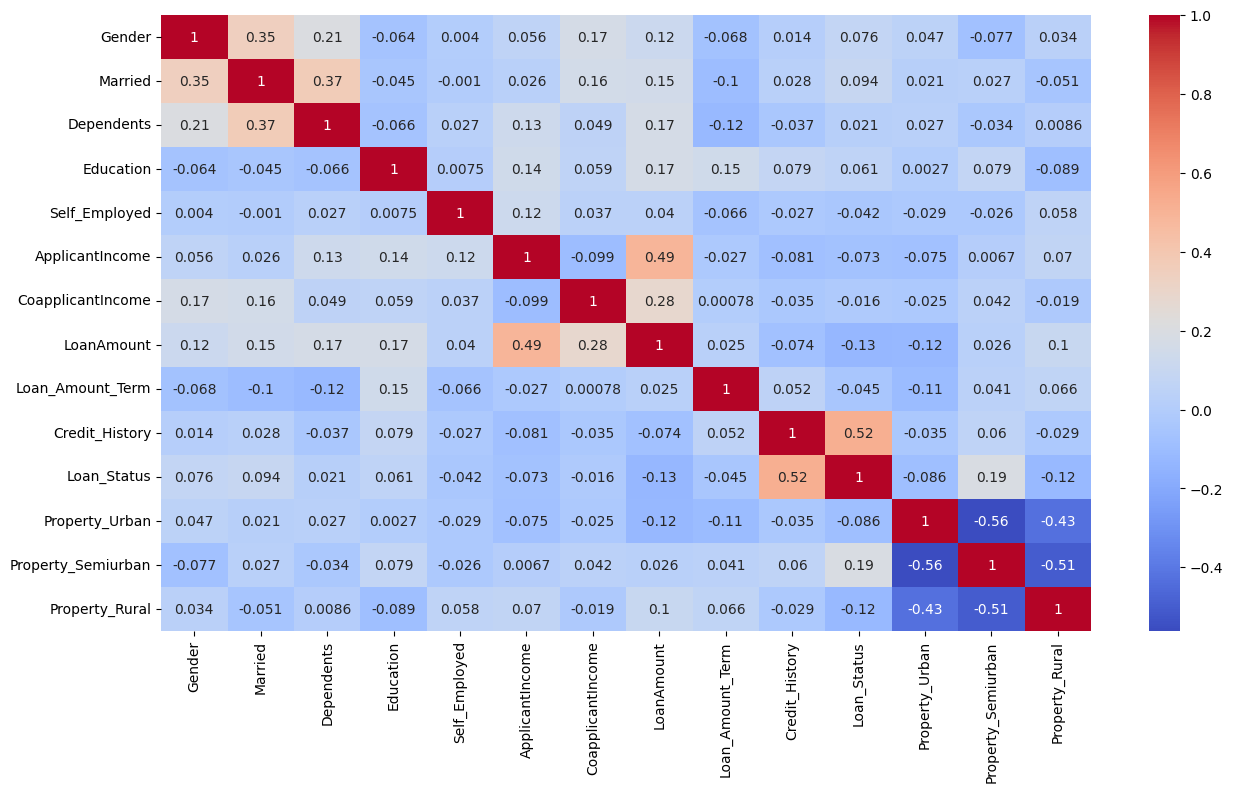

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
corr_data = df.corr()
corr_data['Loan_Status'].abs().sort_values(ascending=False)

,Loan_Status
Loan_Status,1.000000
Credit_History,0.522760
Property_Semiurban,0.190392
LoanAmount,0.130718
Property_Rural,0.118332
Married,0.094214
Property_Urban,0.085684
Gender,0.075750
ApplicantIncome,0.073179
Education,0.060699


# **Module 3- KNN Model Develpoment**

In [ ]:
X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
													test_size=0.4,
													random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((234, 13), (156, 13), (234,), (156,))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
lc = LogisticRegression(max_iter=1000,)

Metrics for KNeighborsClassifier(n_neighbors=3):
Accuracy: 77.78%
Precision: 81.88%
Recall: 85.06%
F1-score: 83.44%
              precision    recall  f1-score   support

           0       0.69      0.64      0.66        80
           1       0.82      0.85      0.83       154

    accuracy                           0.78       234
   macro avg       0.75      0.74      0.75       234
weighted avg       0.77      0.78      0.78       234



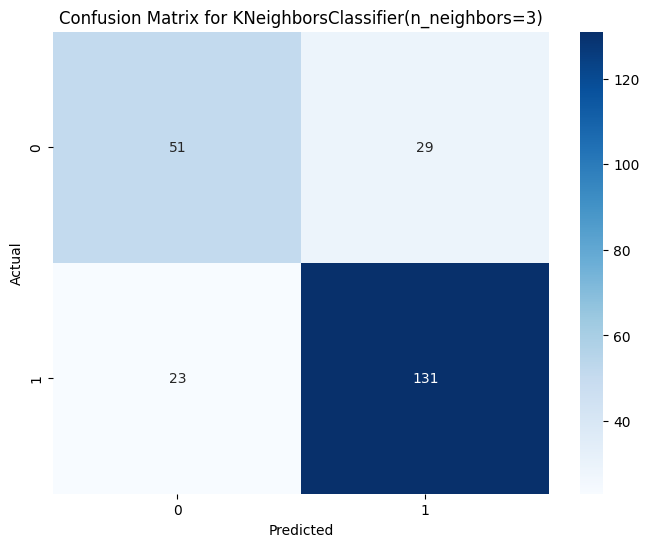

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for LogisticRegression(max_iter=1000):
Accuracy: 79.91%
Precision: 78.01%
Recall: 96.75%
F1-score: 86.38%
              precision    recall  f1-score   support

           0       0.88      0.47      0.62        80
           1       0.78      0.97      0.86       154

    accuracy                           0.80       234
   macro avg       0.83      0.72      0.74       234
weighted avg       0.82      0.80      0.78       234



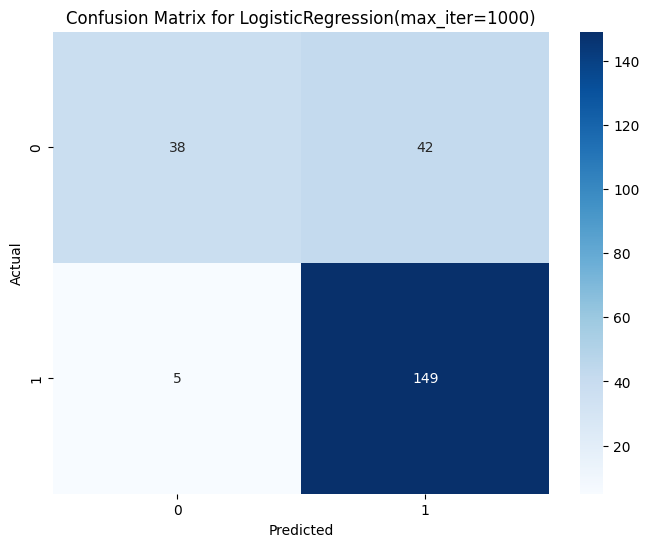

In [ ]:
#Building model on training dataset

for model in (knn, lc):
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_train)
  accuracy = accuracy_score(Y_train, Y_pred)
  precision = precision_score(Y_train, Y_pred)
  recall = recall_score(Y_train, Y_pred)
  f1 = f1_score(Y_train, Y_pred)

  print(f"Metrics for {model}:")
  print(f"Accuracy: {accuracy*100:.2f}%")
  print(f"Precision: {precision*100:.2f}%")
  print(f"Recall: {recall*100:.2f}%")
  print(f"F1-score: {f1*100:.2f}%")
  print(classification_report(Y_train, Y_pred))
  cm = confusion_matrix(Y_train, Y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.title(f"Confusion Matrix for {model}")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

Metrics for KNeighborsClassifier(n_neighbors=3):
Accuracy: 66.67%
Precision: 76.99%
Recall: 76.99%
F1-score: 76.99%
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        43
           1       0.77      0.77      0.77       113

    accuracy                           0.67       156
   macro avg       0.58      0.58      0.58       156
weighted avg       0.67      0.67      0.67       156



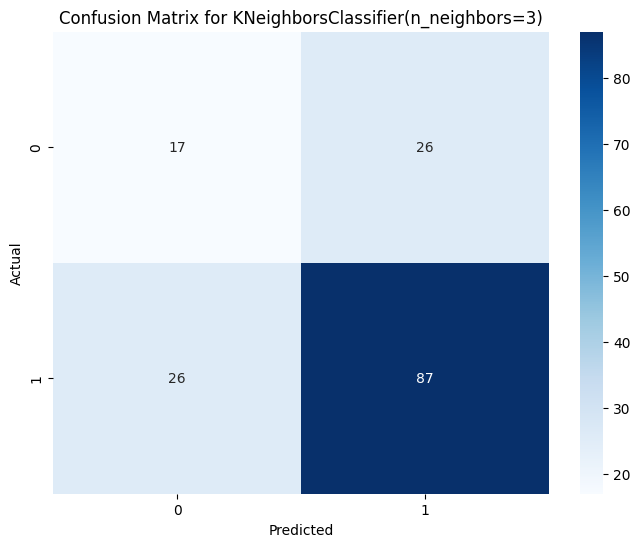

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for LogisticRegression(max_iter=1000):
Accuracy: 82.05%
Precision: 84.00%
Recall: 92.92%
F1-score: 88.24%
              precision    recall  f1-score   support

           0       0.74      0.53      0.62        43
           1       0.84      0.93      0.88       113

    accuracy                           0.82       156
   macro avg       0.79      0.73      0.75       156
weighted avg       0.81      0.82      0.81       156



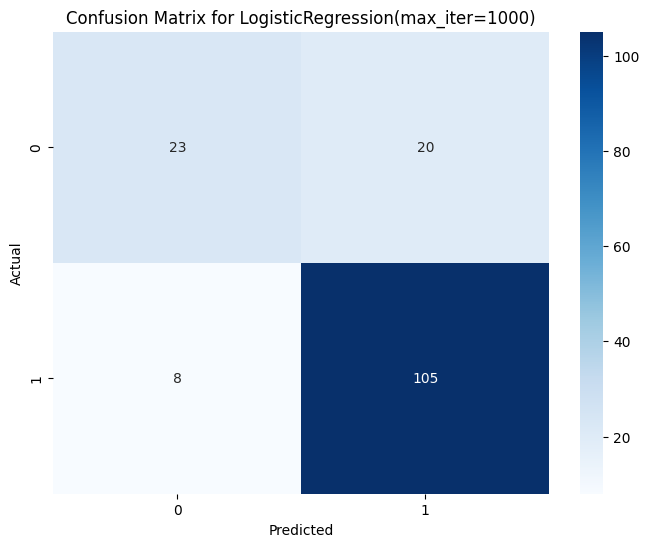

In [ ]:
#Testing the model on testing dataset

for model in (knn, lc):
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)

  accuracy = accuracy_score(Y_test, Y_pred)
  precision = precision_score(Y_test, Y_pred)
  recall = recall_score(Y_test, Y_pred)
  f1 = f1_score(Y_test, Y_pred)

  print(f"Metrics for {model}:")
  print(f"Accuracy: {accuracy*100:.2f}%")
  print(f"Precision: {precision*100:.2f}%")
  print(f"Recall: {recall*100:.2f}%")
  print(f"F1-score: {f1*100:.2f}%")
  print(classification_report(Y_test, Y_pred))

  cm = confusion_matrix(Y_test, Y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.title(f"Confusion Matrix for {model}")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

In [ ]:
# Cross-validation for KNN
knn_cv_scores = cross_val_score(knn, X, Y, cv=5)  # 5-fold cross-validation
knn_mean_accuracy = knn_cv_scores.mean()

# Cross-validation for Logistic Regression
lc_cv_scores = cross_val_score(lc, X, Y, cv=5)  # 5-fold cross-validation
lc_mean_accuracy = lc_cv_scores.mean()

print(f'KNN Mean Accuracy is {(knn_mean_accuracy*100):.2f}%')
print(f'Logistic Regression Mean Accuracy is {(lc_mean_accuracy*100):.2f}%')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KNN Mean Accuracy is 64.36%
Logistic Regression Mean Accuracy is 80.00%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
